<a href="https://colab.research.google.com/github/PDahal2871/ML-Projects/blob/master/CardioVascularDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [43]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [45]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

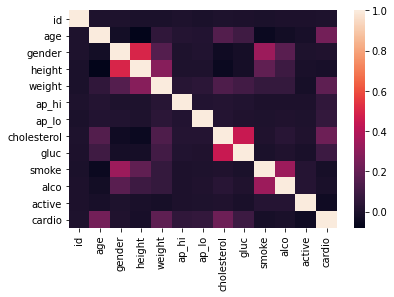

In [46]:
sns.heatmap(data.corr())

1    45079
2    24222
Name: gender, dtype: int64


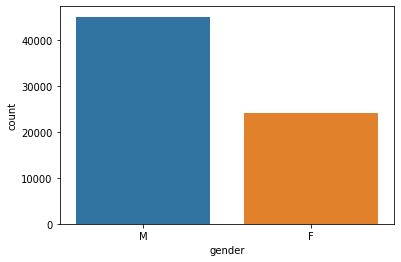

In [47]:
print(data['gender'].value_counts())
sns.countplot(data['gender'].replace([1,2],["M","F"]))

In [0]:
data.drop(['id'], axis=1, inplace=True)

In [49]:
data
print(data['cardio'].value_counts())
data.head()

0    34679
1    34622
Name: cardio, dtype: int64


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [0]:
X = data.iloc[:,0:-1]
y= data.iloc[:,-1]

In [51]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,22469,1,155,69.0,130,80,2,2,0,0,1
1,14648,1,163,71.0,110,70,1,1,0,0,1
2,21901,1,165,70.0,120,80,1,1,0,0,1
3,14549,2,165,85.0,120,80,1,1,1,1,1
4,23393,1,155,62.0,120,80,1,1,0,0,1


In [52]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: cardio, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [56]:
def models(X_train, y_train):
    #Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    #KNN
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X_train, y_train)
    
    #svm 
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    
    #DTC
    dtc = DecisionTreeClassifier(criterion='entropy')
    dtc.fit(X_train, y_train)
    
    #DTC
    rfc = RandomForestClassifier(n_estimators=15, criterion='entropy')
    rfc.fit(X_train, y_train)
    
    print("Accuracy of LR in train sets : ", lr.score(X_train,y_train))
    print("Accuracy of KNN in train sets : ", knn.score(X_train,y_train))
    print("Accuracy of SVM in train sets : ", svm.score(X_train,y_train))
    print("Accuracy of DTC in train sets : ", dtc.score(X_train,y_train))
    print("Accuracy of RFC in train sets : ", rfc.score(X_train,y_train))
    
    return lr, knn, svm, dtc, rfc

model = models(X_train, y_train)

Accuracy of LR in train sets :  0.7178030303030303
Accuracy of KNN in train sets :  0.7237193362193363
Accuracy of SVM in train sets :  0.7218795093795094
Accuracy of DTC in train sets :  0.9998196248196248
Accuracy of RFC in train sets :  0.9904401154401155


In [57]:
from sklearn.metrics import accuracy_score
#Lets check in test sets as well
for i in range(len(model)):
  ac = accuracy_score(y_test, model[i].predict(X_test))
  print(ac)
  print()
  

0.7201500613231369

0.656085419522401

0.7241180290022365

0.6341533799870139

0.706947550681769



In [0]:
#So Random Forest is the best classifier for this project

In [60]:
rfc = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators":[5,10,15,20,25], "criterion":['entropy','gini']}
gscv = GridSearchCV(estimator=rfc, param_grid=parameters, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [61]:
gscv.best_params_

{'criterion': 'entropy', 'n_estimators': 20}

In [62]:
gscv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
gscv.best_score_

0.7107323232323232

In [72]:
#For SVM
svm = SVC()
from sklearn.model_selection import GridSearchCV
parameter = {"kernel":['rbf','linear']}
gscvS = GridSearchCV(estimator=svm, param_grid=parameter, cv=5)
gscvS.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['rbf', 'linear']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [73]:
gscvS.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
gscvS.best_params_

{'kernel': 'rbf'}

In [75]:
gscvS.best_score_

0.7248737373737374